In [1]:
import pandas as pd
import datetime
import requests
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
import pickle

timeWindow = 2000
coinTo = "BTC"
ccFrom = "EUR"
exchange = "Kraken"
a=[]

def getHistPriceData(coinTo, ccFrom, limit, exchange):
    curl = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&e={}'\
            .format(coinTo.upper(), ccFrom.upper(), limit, exchange)
    data = requests.get(curl, headers={'User-Agent': 'Mozilla/5.0'}).json()['Data']
    df = pd.DataFrame(data)
    df['date'] = [datetime.datetime.fromtimestamp(d).strftime('%Y-%m-%d') for d in df.time]
    return df
df=getHistPriceData(coinTo, ccFrom,timeWindow, exchange)
print(df)
df.to_csv('BITCU.csv')

            time     close      high       low      open  volumefrom  \
0     1434585600    217.00    220.75    213.00    215.92     3877.07   
1     1434672000    214.73    219.59    214.00    217.00     3151.86   
2     1434758400    214.33    215.30    210.00    214.73     2028.26   
3     1434844800    213.27    215.02    210.92    214.33     1411.87   
4     1434931200    216.78    217.31    212.50    213.27     3063.65   
...          ...       ...       ...       ...       ...         ...   
1996  1607040000  15411.50  16085.00  15350.00  16019.20     5791.70   
1997  1607126400  15812.00  15850.00  15277.70  15411.50     2113.53   
1998  1607212800  15970.70  16000.00  15568.90  15812.00     1768.53   
1999  1607299200  15837.10  16010.00  15614.60  15970.70     3003.29   
2000  1607385600  15522.00  15933.90  15401.00  15837.10     2833.34   

         volumeto conversionType conversionSymbol        date  
0       844248.51   force_direct                   2015-06-18  
1      

In [2]:
df.dropna()
df.drop_duplicates(keep=False,inplace=True)
df.head()

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,date
0,1434585600,217.00,220.75,213.00,215.92,3877.07,844248.51,force_direct,,2015-06-18
1,1434672000,214.73,219.59,214.00,217.00,3151.86,684613.42,force_direct,,2015-06-19
2,1434758400,214.33,215.30,210.00,214.73,2028.26,431529.00,force_direct,,2015-06-20
3,1434844800,213.27,215.02,210.92,214.33,1411.87,300554.39,force_direct,,2015-06-21
4,1434931200,216.78,217.31,212.50,213.27,3063.65,659358.71,force_direct,,2015-06-22


In [3]:
df.shape

(2001, 10)

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
data = df.set_index("date")

In [6]:
df.corr()
#pair wise correlation

,time,close,high,low,open,volumefrom,volumeto
time,1.000000,0.831935,0.826240,0.841475,0.831822,-0.099126,0.488197
close,0.831935,1.000000,0.998829,0.998184,0.997660,-0.083259,0.656573
high,0.826240,0.998829,1.000000,0.996554,0.998713,-0.064113,0.676646
low,0.841475,0.998184,0.996554,1.000000,0.997470,-0.103469,0.634905
open,0.831822,0.997660,0.998713,0.997470,1.000000,-0.079824,0.659982
volumefrom,-0.099126,-0.083259,-0.064113,-0.103469,-0.079824,1.000000,0.525333
volumeto,0.488197,0.656573,0.676646,0.634905,0.659982,0.525333,1.000000


In [7]:
data['avg']=data[['open','close']].mean(axis=1)

In [8]:
data.head()

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,avg
date,,,,,,,,,,
2015-06-18,1434585600,217.00,220.75,213.00,215.92,3877.07,844248.51,force_direct,,216.460
2015-06-19,1434672000,214.73,219.59,214.00,217.00,3151.86,684613.42,force_direct,,215.865
2015-06-20,1434758400,214.33,215.30,210.00,214.73,2028.26,431529.00,force_direct,,214.530
2015-06-21,1434844800,213.27,215.02,210.92,214.33,1411.87,300554.39,force_direct,,213.800
2015-06-22,1434931200,216.78,217.31,212.50,213.27,3063.65,659358.71,force_direct,,215.025


# Ensemble Learning
### a) Linear Regression
### b) Random Forest
### c) LSTM

<function matplotlib.pyplot.show(*args, **kw)>

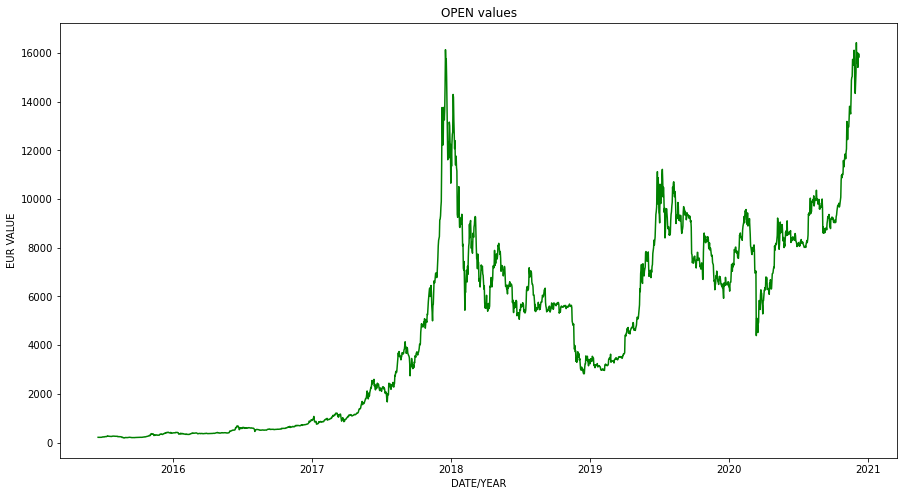

In [9]:
x=data['open']
plt.figure(figsize=(15,8))
plt.plot(x,color='g')
plt.title("OPEN values")
plt.xlabel("DATE/YEAR")
plt.ylabel("EUR VALUE")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

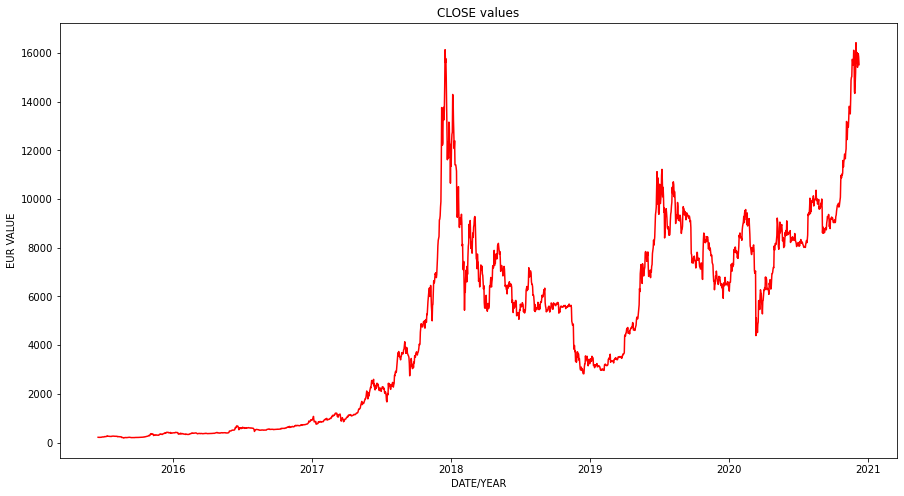

In [10]:
y = data['close']
plt.figure(figsize=(15,8))
plt.plot(y,color='r')
plt.title("CLOSE values")
plt.xlabel("DATE/YEAR")
plt.ylabel("EUR VALUE")
plt.show

Text(0, 0.5, 'EUR VALUE')

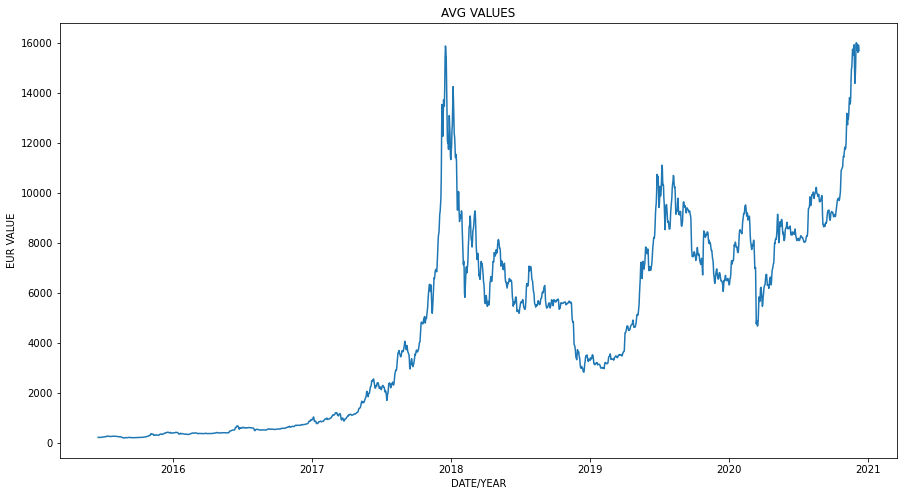

In [11]:
plt.figure(figsize=(15,8))
plt.plot(data.index,data.avg)
plt.title("AVG VALUES")
plt.xlabel("DATE/YEAR")
plt.ylabel("EUR VALUE")

In [12]:
x.head(-5)

date
2015-06-18      215.92
2015-06-19      217.00
2015-06-20      214.73
2015-06-21      214.33
2015-06-22      213.27
                ...   
2020-11-29    14840.20
2020-11-30    15200.00
2020-12-01    16424.10
2020-12-02    15575.00
2020-12-03    15873.20
Name: open, Length: 1996, dtype: float64

In [13]:
y.head(-5)

date
2015-06-18      217.00
2015-06-19      214.73
2015-06-20      214.33
2015-06-21      213.27
2015-06-22      216.78
                ...   
2020-11-29    15200.00
2020-11-30    16424.10
2020-12-01    15575.00
2020-12-02    15873.20
2020-12-03    16019.20
Name: close, Length: 1996, dtype: float64

In [14]:
Y = data['close']
X = data.drop(columns=['close','avg'])

In [35]:
#train test split
xtrain = X['2015-05':'2019-10']
ytrain = Y['2015-05':'2019-10']
xtest = X['2019-11':'2020']
ytest = Y['2019-11':'2020']

## a) Linear Regression

In [36]:
clf=LinearRegression()

In [38]:
clf.fit(xtrain,ytrain)

LinearRegression()

In [39]:
clf.score(xtest,ytest)

0.9904847608747037

In [40]:
clf.score(xtrain,ytrain)

0.999055472191049

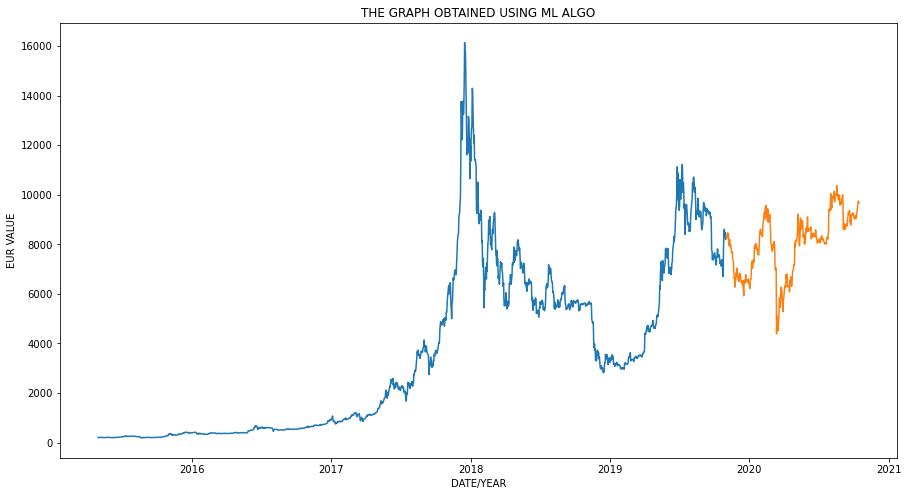

In [53]:

plt.figure(figsize=(15,8))
plt.title("THE GRAPH OBTAINED USING ML ALGO")
plt.xlabel("DATE/YEAR")
plt.ylabel("EUR VALUE")
plt.plot(ytrain)
plt.plot(ytest)

In [54]:
filename = 'final_model.sav'
pickle.dump(clf,open(filename,'wb'))

In [55]:
x1test = X['2020-01']
y1test = Y['2020-01']

In [56]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x1test)

array([6428.43880479, 6271.05526164, 6518.10868025, 6571.35526198,
       6656.37803761, 6881.27287236, 7238.92753816, 7429.34425769,
       7063.80978133, 7220.9591148 , 7317.69354723, 7289.33050095,
       7251.02579796, 7813.08952097, 7762.14085068, 7775.51417527,
       7967.34763231, 8007.99095069, 7985.36266296, 7730.30603202,
       7780.25889524, 7821.55062957, 7593.82396547, 7584.08941317,
       7554.56021487, 7730.4019811 , 8027.06197588, 8181.64121503,
       8408.01248498, 8521.48346217, 8409.94961991])

## b) Random Forest Algorithm

In [57]:
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(xtrain,ytrain)
accuracy=reg.score(xtest,ytest)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')

Accuracy is: 98.4194 %


Text(0, 0.5, 'EUR VALUE')

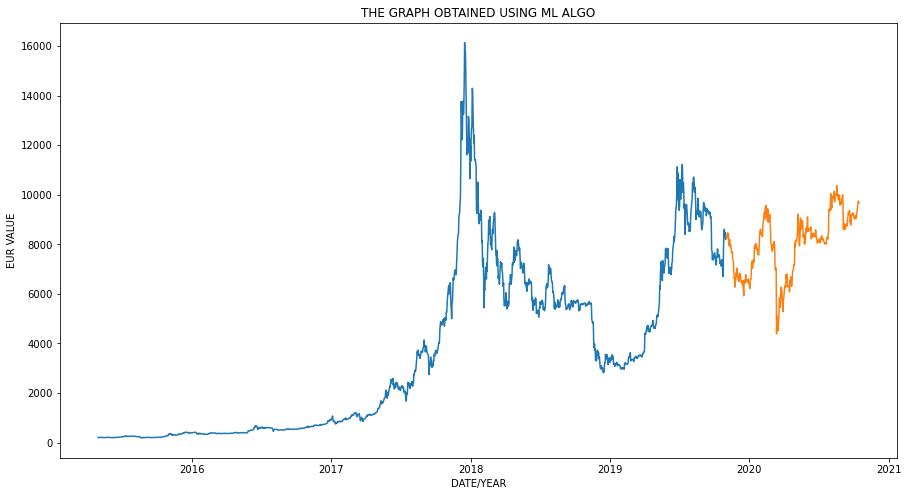

In [60]:
plt.figure(figsize=(15,8))
plt.title("THE GRAPH OBTAINED USING ML ALGO")
plt.plot(ytrain)
plt.plot(ytest)
plt.xlabel("DATE/YEAR")
plt.ylabel("EUR VALUE")